In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#import pickle
import glob
#import matplotlib.image as mpimg
#from moviepy.editor import VideoFileClip
#from collections import deque
#import sys

## Camera Calibration

In [2]:
def camera_calibration():
    
    global camera_mtx,dist_coeff
    # Preparing the points for the object 
    objectPoints = np.zeros((6 * 9, 3), np.float32)
    objectPoints[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

    # Storing all the points for the object and the image from all the images
    object_points = []
    image_points = []

    # Getting the directory of all of the calibrated images
    img = glob.glob('./camera_calibrations/*.jpg')
    images = None

    for indx, fname in enumerate(img):
        images = cv2.imread(fname)
        gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
        # it should be colored image or a 8-bit grayscale  
        ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

        if ret == True:
            object_points.append(objectPoints)
            image_points.append(corners)

    # getting the size of the Image 
    imageSize = (images.shape[1], images.shape[0])

    # Calibrate camera
    ret, camera_mtx, dist_coeff, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, imageSize, None, None)

camera_calibration()

## Undistorting image using camera matrix and distortion coefficient

In [3]:
def undistort(images, camera_mtx, dist_coeff):
    """
    we will use cv2.undistort to undistort
    :param images: we will assume that the input image is RGB (imread by mpimg)
    :param camera_mtx: it the parameter for the calibration of the camera 
    :param dist_coeff:is a calibration parameter for the camera
    :return: Undistorted image
    """
   
    undistorted_img = cv2.undistort(images, camera_mtx, dist_coeff, None, camera_mtx)

    return undistorted_img

## Testing a Road Image

Text(0.5, 1.0, 'Undistored Image')

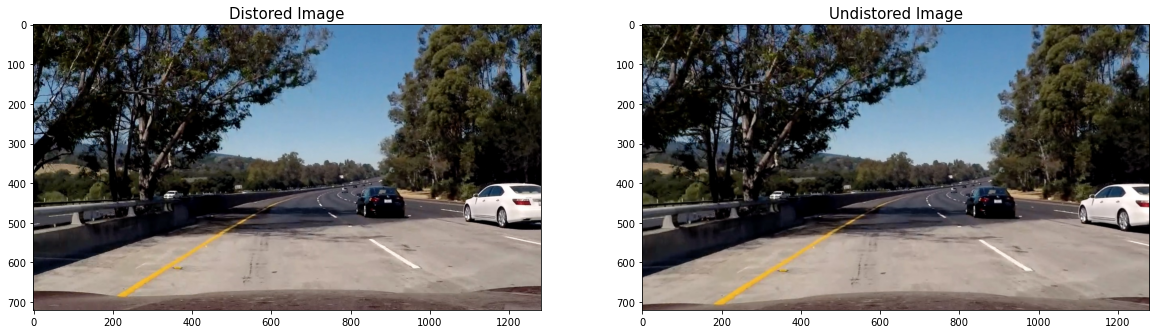

In [4]:
img = cv2.imread('test_images/test5.jpg')

# transform to BGR to fit cv2.imread
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

undistorted_img = undistort(img, camera_mtx, dist_coeff)


f, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(img)
ax1.set_title('Distored Image', fontsize = 15)

ax2.imshow(undistorted_img)
ax2.set_title('Undistored Image', fontsize = 15)